# DATA UNDERSTANDING

In [1]:
import pysal
import pandas
import shapefile as shp
import matplotlib.pyplot as plt

%matplotlib inline
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [2]:
def shape_layer(shapefile, style="g-"):
    sf = shp.Reader(shapefile)
    coords = []
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, style, zorder=10)

- Check http://proximityone.com/census2010tlf.htm for info about some attributes

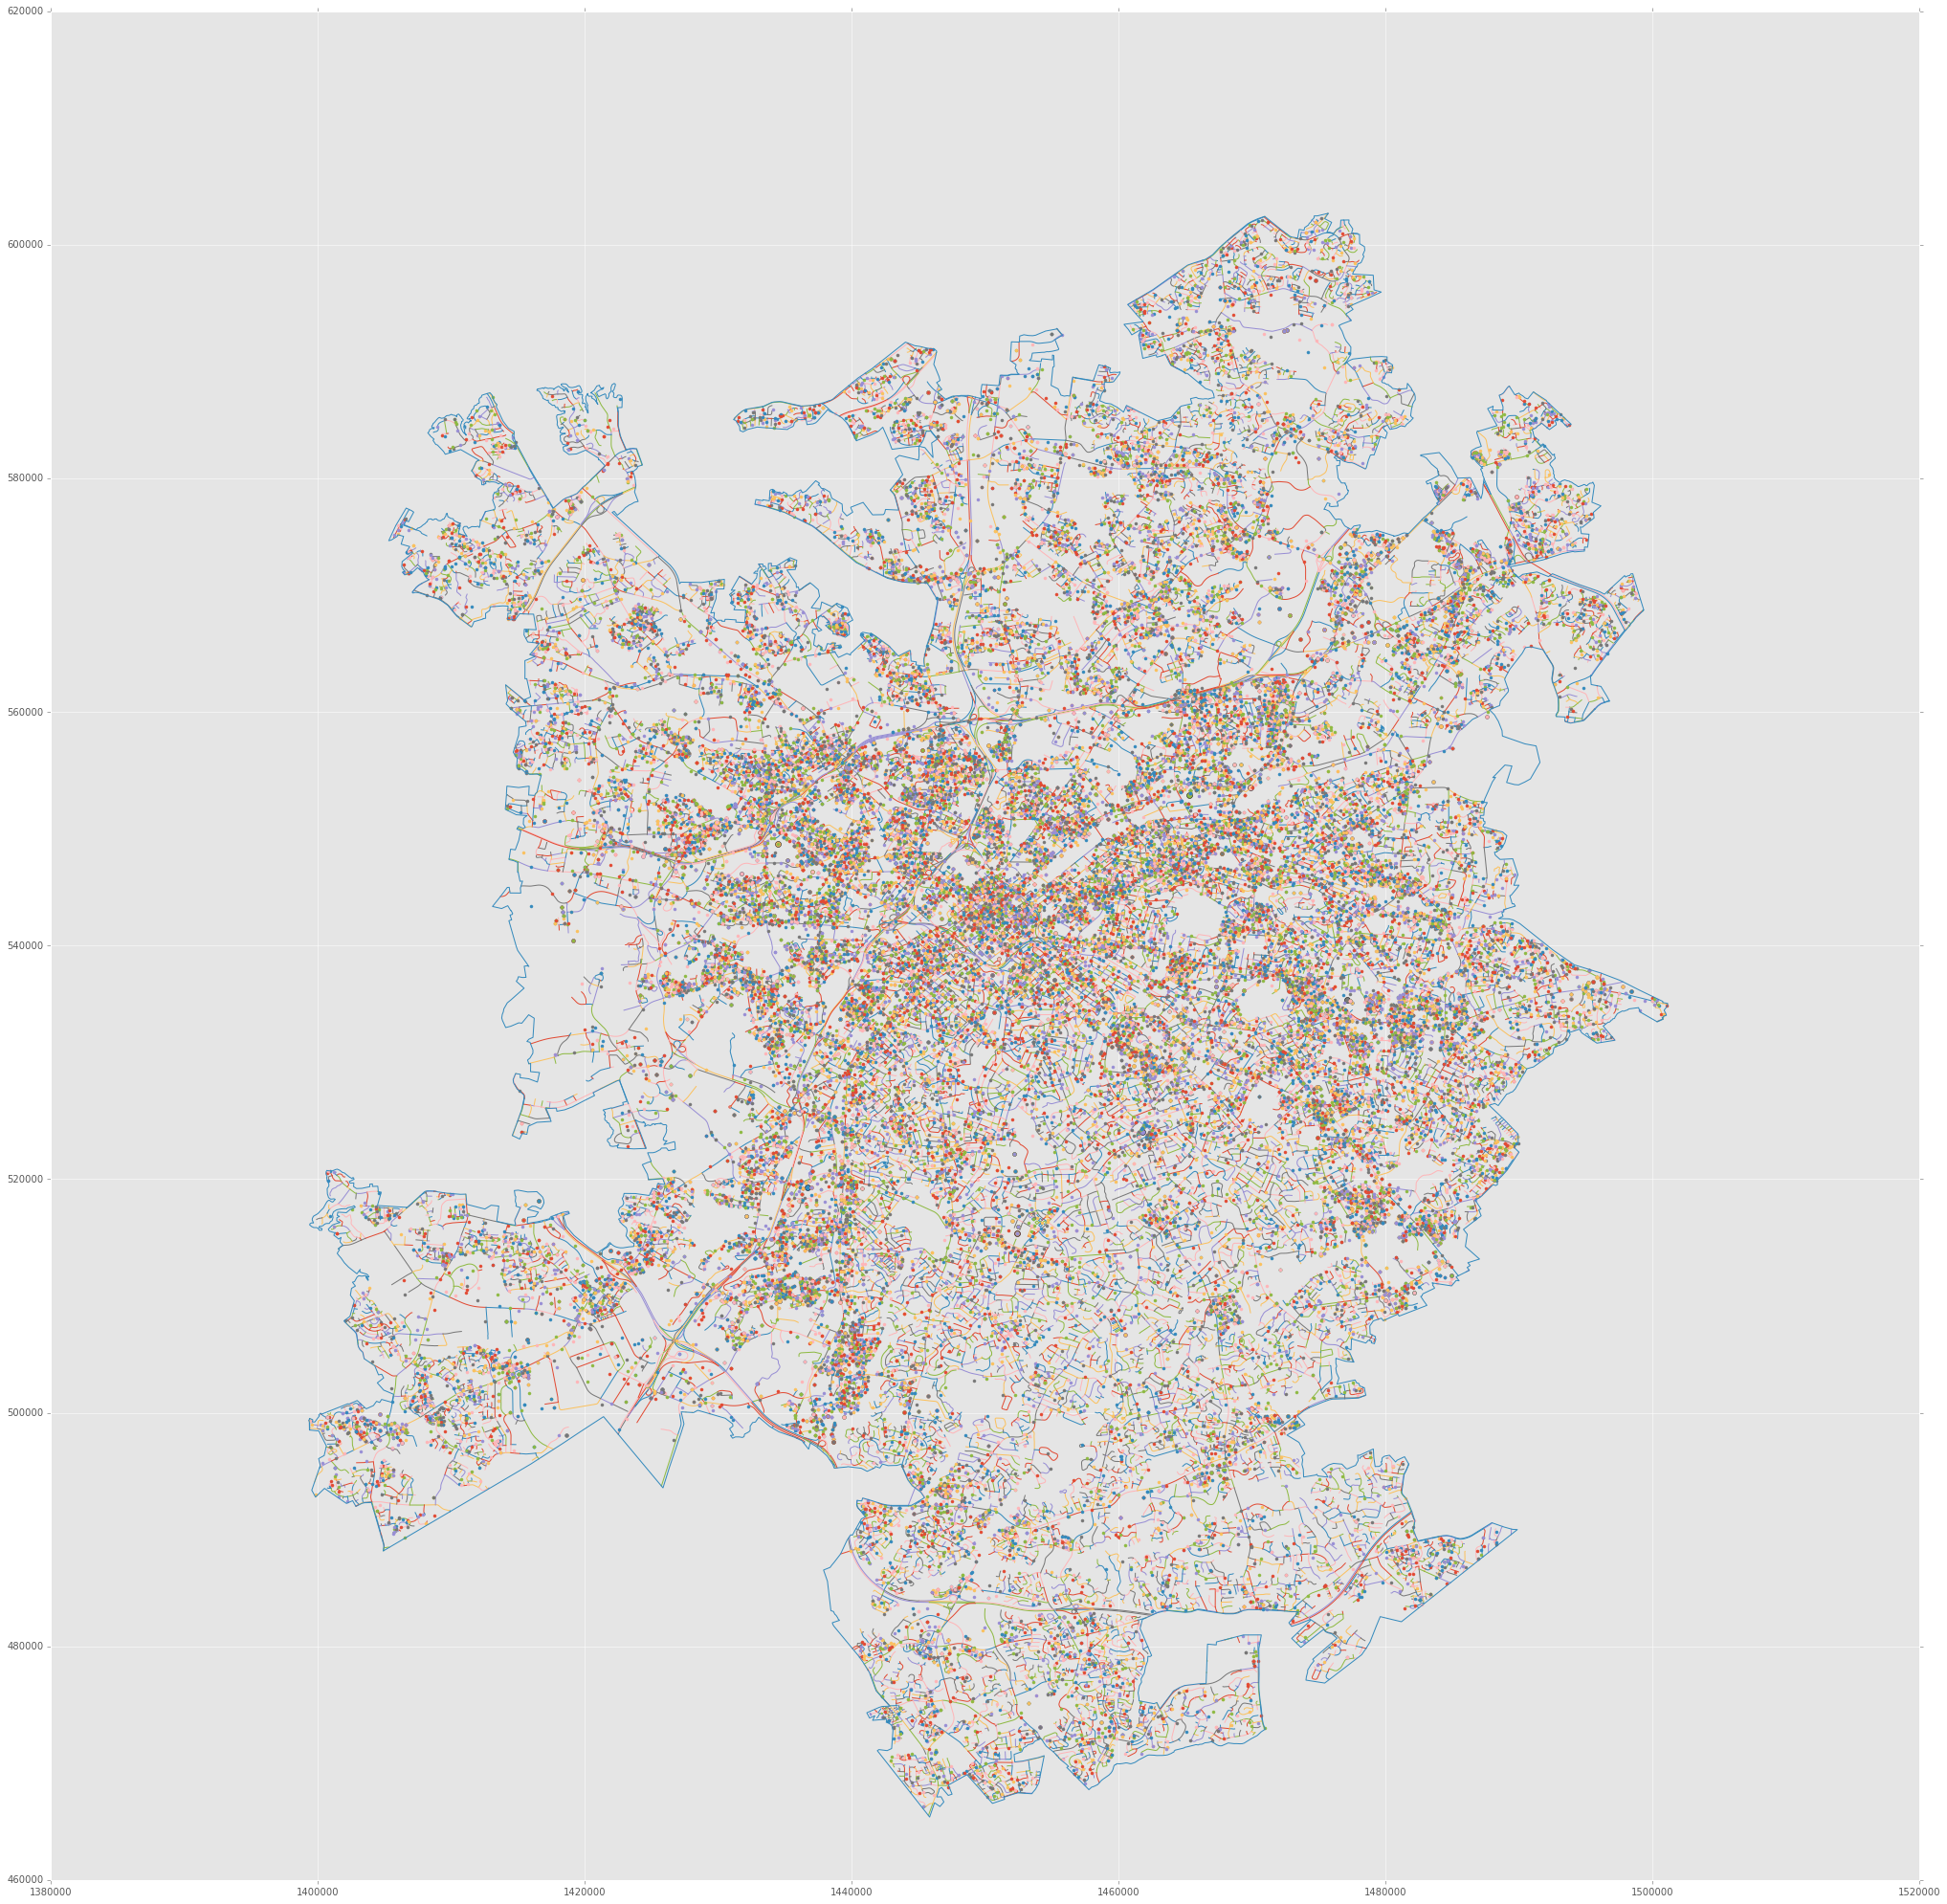

In [6]:
fig_size = [35, 35]
plt.rcParams["figure.figsize"] = fig_size
plt.style.use('ggplot')

# plt.figure()
shape_layer("./dataset/Data/POI_AlcoholicDrinkingPlaces_CLIP.shp", style="bo")
shape_layer("./dataset/Data/CLT_Streets.shp", style="-")
shape_layer("./dataset/Data/CrimeIncident_CMPD_2010.shp", style=".")
shape_layer("./dataset/Data/CLT_Boundary.shp", style="-")
# plt.show()

---
### Block Groups

Charlotte block groups with last 6 non-spatial attributes for 
- <b>ARPCIncome</b>: percapital Income; type: real, length 18
- <b>ARPerHEdu</b>: percentage of education with high school and above
- <b>ARPerWork</b>: percentage of population employed
- <b>ARPerRMI5L</b>: percentage of population who rent and moved in less than 5 years ago
- <b>ARPer3MU</b>: percentage of home with 3 or more multiple unit structure


In [3]:
db_bgroups = pysal.open('./dataset/Data/CLT_BlockGroups_Attr.dbf','r')
df_bgroups = pandas.DataFrame(db_bgroups[:], columns=db_bgroups.header)
print df_bgroups.shape
df_bgroups[:5]

(485, 18)


STATEFP10 COUNTYFP10 TRACTCE10 BLKGRPCE10       GEOID10     NAMELSAD10  \
0        37        119    005301          1  371190053011  Block Group 1   
1        37        119    001400          2  371190014002  Block Group 2   
2        37        119    001200          3  371190012003  Block Group 3   
3        37        119    005847          1  371190058471  Block Group 1   
4        37        119    000700          1  371190007001  Block Group 1   

  MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10    INTPTLON10  \
0   G5030          S  3692032         0  +35.2582845  -080.8060757   
1   G5030          S  1051009         0  +35.2437169  -080.8024062   
2   G5030          S  2111630      6882  +35.2274080  -080.7930404   
3   G5030          S  2937830     19993  +35.0855266  -080.7642117   
4   G5030          S  1271722         0  +35.2385940  -080.8190269   

   ARPCIncome  ARPerHEdu  ARPerWork  ARPerMI5L  ARPerRMI5L   ARPer3MU  
0     12375.0   7.486865  69.674647  73.998045   68.132942  82.098765  
1     39139.0  13.474495  83.140878  55.172414   25.689655  27.016645  
2     60271.0   9.193122  89.514066  23.713927   12.421581   3.436019  
3     70142.0  13.423352  84.393758  20.808081    0.000000   0.000000  
4     28051.0   4.301075  72.321429  51.704545   29.829545  66.190476

---
### Blocks
Charlotte blocks with last 6 attributes for 
- <b>ARPopDen</b>: population density; type: real, length 18
- <b>ARPerAA</b>: percentage of population who are American African
- <b>ARHeteInx</b>: heterogeneity index for races
- <b>ARPerM1724</b>: percentage of population who are 17-24 males
- <b>ARPerHOwn</b>: percentage of population who own home
- <b>ARPerSF</b>: percentage of families with single parent


In [4]:
db_blocks = pysal.open('./dataset/Data/CLT_Blocks_Attr.dbf','r')
df_blocks = pandas.DataFrame(db_blocks[:], columns=db_blocks.header)
print df_blocks.shape
df_blocks[:5]

(8354, 12)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  ARPopDen  \
0        37        119    005401    2028  371190054012028       N  0.000116   
1        37        119    004600    2025  371190046002025       N  0.000000   
2        37        119    004100    2005  371190041002005       N  0.000276   
3        37        119    005521    3047  371190055213047       N  0.000216   
4        37        119    005200    3043  371190052003043       N  0.000085   

     ARPerAA  ARHeteInx  ARPerM1724   ARPerHOwn    ARPerSF  
0  97.590361   0.047322    3.614458   84.615385  33.333333  
1   0.000000   0.000000    0.000000    0.000000   0.000000  
2  21.428571   0.482143    7.142857   61.290323   3.225806  
3  85.106383   0.266184    4.255319  100.000000  14.285714  
4  50.000000   0.500000    0.000000    0.000000   0.000000

---
### Crime per Street

In [7]:
db_crime_per_street = pysal.open('./dataset/Data/CLT_Streets_crmCntAUNCC_Business.dbf','r')
df_crime_per_street = pandas.DataFrame(db_crime_per_street[:], columns=db_crime_per_street.header)
df_crime_per_street.sort_values(by="crmCntAUNC", ascending=False)[:3]

WHOLESTNAM  crmCntAUNC  BusinCnt
31873    N Tryon St         428         2
14911    E Trade St         392        19
904    Wilkinson Bv         376        26

---
### Businesses

In [ ]:
db_business = pysal.open('./dataset/Data/CLT_Business_Attri.dbf','r')
df_business = pandas.DataFrame(db_business[:], columns=db_business.header)
print df_business.shape
df_business[:4]

(24375, 80)


OBJECTID  Join_Count          ID NUM_ADDR NUMADD_M Match_   year_  Quarter  \
0     18421           1     48567.0   339743   339743      g  2008.0      1.0   
1     29072           0  20100386.0                           2008.0      1.0   
2      7961           1    288651.0   464886        0      g  2008.0      1.0   
3     12303           1    358823.0   464886        0      g  2008.0      1.0   

      NAICS CntCode   ...    extra_Info NewAdd11  emp_old tempadd StrMapped  \
0  531210.0     119   ...             0        0        4       0         0   
1  518210.0     119   ...             1        0       10      -2         0   
2  541410.0     119   ...             0        0        2       0         0   
3  541310.0     119   ...             0        0        4       0         0   

      WHOLESTNAM    WHOLESTN_F    ST_NAME ST_NAME_LA StrMapID  
0  LANCASTER HWY  LANCASTER HY  LANCASTER         HY    28294  
1  LANCASTER HWY  LANCASTER HY  LANCASTER         HY    28294  
2  LANCASTER HWY  LANCASTER HY  LANCASTER         HY    28294  
3  LANCASTER HWY  LANCASTER HY  LANCASTER         HY    28294  

[4 rows x 80 columns]

In [ ]:
fig_size = [35, 35]
plt.rcParams["figure.figsize"] = fig_size
shape_layer("./dataset/Data/CLT_Streets.shp", style="y-")
shape_layer("./dataset/Data/CLT_Boundary.shp", style="-")
shape_layer("./dataset/Data/CLT_Business_Attri.shp", style="b.")

KeyboardInterrupt: 

---

### Crimes

In [9]:
db_crimes = pysal.open('./dataset/Data/CrimeIncident_CMPD_2010.dbf','r')
df_crimes = pandas.DataFrame(db_crimes[0:-1], columns=db_crimes.header)
pandas.set_option('display.max_columns',  100)
print df_crimes.shape
df_crimes[:2]

(67594, 53)


OBJECTID_1  OBJECTID    Complaint_      ComplainNo  Block_No Direction  \
0           1         1  2.010010e+13  20100101000504    1120.0             
1           2         2  2.010010e+13  20100101000506    8305.0             

   Street_Nam Street_Typ Suffix Apt_No       City State ZipCode          X  \
0  SCALEYBARK         RD                CHARLOTTE    NC          1444054.0   
1  SHINKANSEN         DR                CHARLOTTE    NC   28213  1481937.0   

          Y  Division       Report_Dat              Location_D Location_T  \
0  523228.0      26.0  01/01/2010 0005  Location of occurrence    Indoors   
1  562104.0      14.0  01/01/2010 0005  Location of occurrence   Outdoors   

        Incident_F Incident_T       Place1                        Place2  \
0  01/01/2010 0005             Residential  Apartment/Duplex Private Res   
1  01/01/2010 0005             Residential             Private Residence   

  CSS_Called                            Clearance_ Clearance1     Case_Statu  \
0          N  Normal Clearance - Cleared by Arrest   1/1/2010  Close/Cleared   
1          N  Normal Clearance - Cleared by Arrest   1/1/2010  Close/Cleared   

                                Reporting_                   Follow_Up_  \
0  Charlotte-Mecklenburg Police Department         26-WESTOVER DIVISION   
1  Charlotte-Mecklenburg Police Department  14-UNIVERSITY CITY DIVISION   

                 NIBRS_Hi_C rp_last_na rp_first_n rp_middle_ rp_Block_N  \
0            Simple Assault   ISENHOUR      #3907                         
1  Drug/Narcotic Violations    ROCEDAR     ALFORD                  8309   

  rp_Directi  rp_Street_ rp_Street1 re_Suffix rp_Apt_No    rp_City rp_State  \
0                                                                             
1             SHINKANSEN         DR                      CHARLOTTE       NC   

  rp_ZipCode F41 F42  OID_    Complaint1      Complain_1    Attempt  \
0                        0  2.010010e+13  20100101000504  Completed   
1      28213             1  2.010010e+13  20100101000506  Completed   

                                          NIBRScateg  \
0  Assault / Assault: on Government Officer or Em...   
1  Miscellaneous criminal / Other Unlisted Crimin...   

                 NIBRSclass NOCcode  strMapped     WHOLESTNAM  
0            Simple Assault     13B          1  SCALEYBARK RD  
1  Drug/Narcotic Violations     90Z          1  SHINKANSEN DR

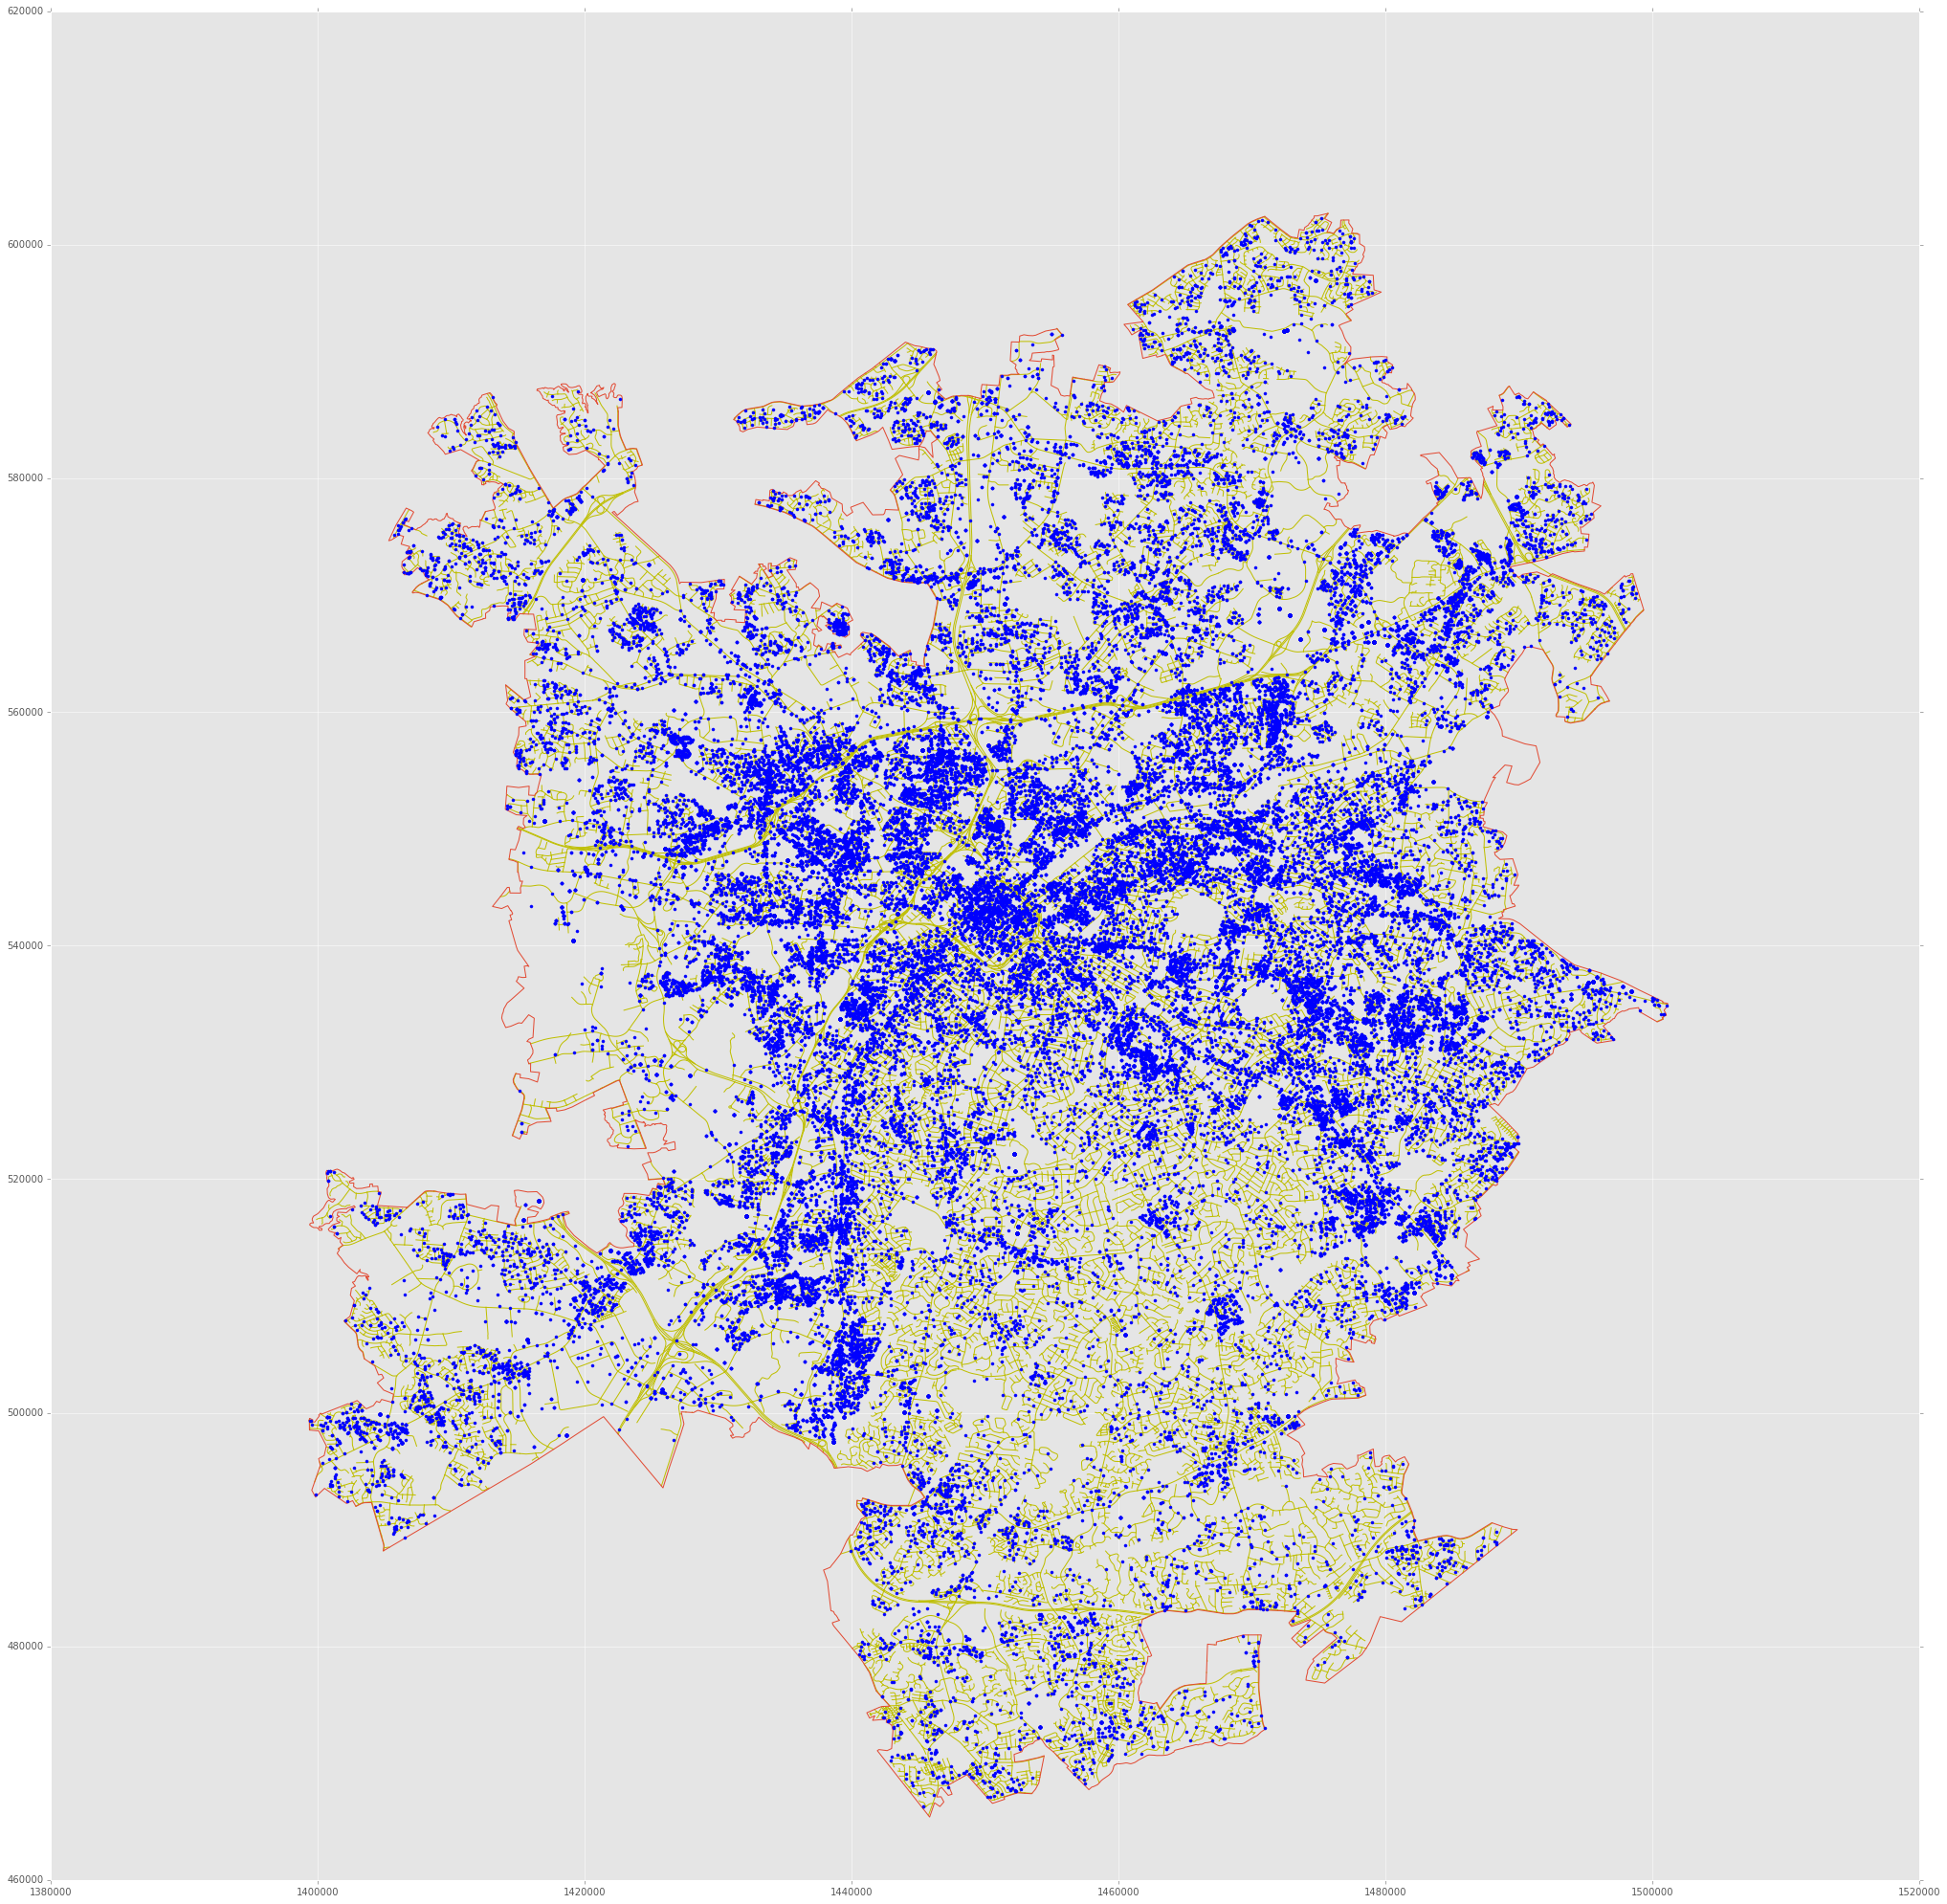

In [58]:
fig_size = [35, 35]
plt.rcParams["figure.figsize"] = fig_size
shape_layer("./dataset/Data/CLT_Streets.shp", style="y-", zorder=10)
shape_layer("./dataset/Data/CLT_Boundary.shp", style="-", zorder=10)
shape_layer("./dataset/Data/CrimeIncident_CMPD_2010.shp", style="b.", zorder=10)

---
### POI

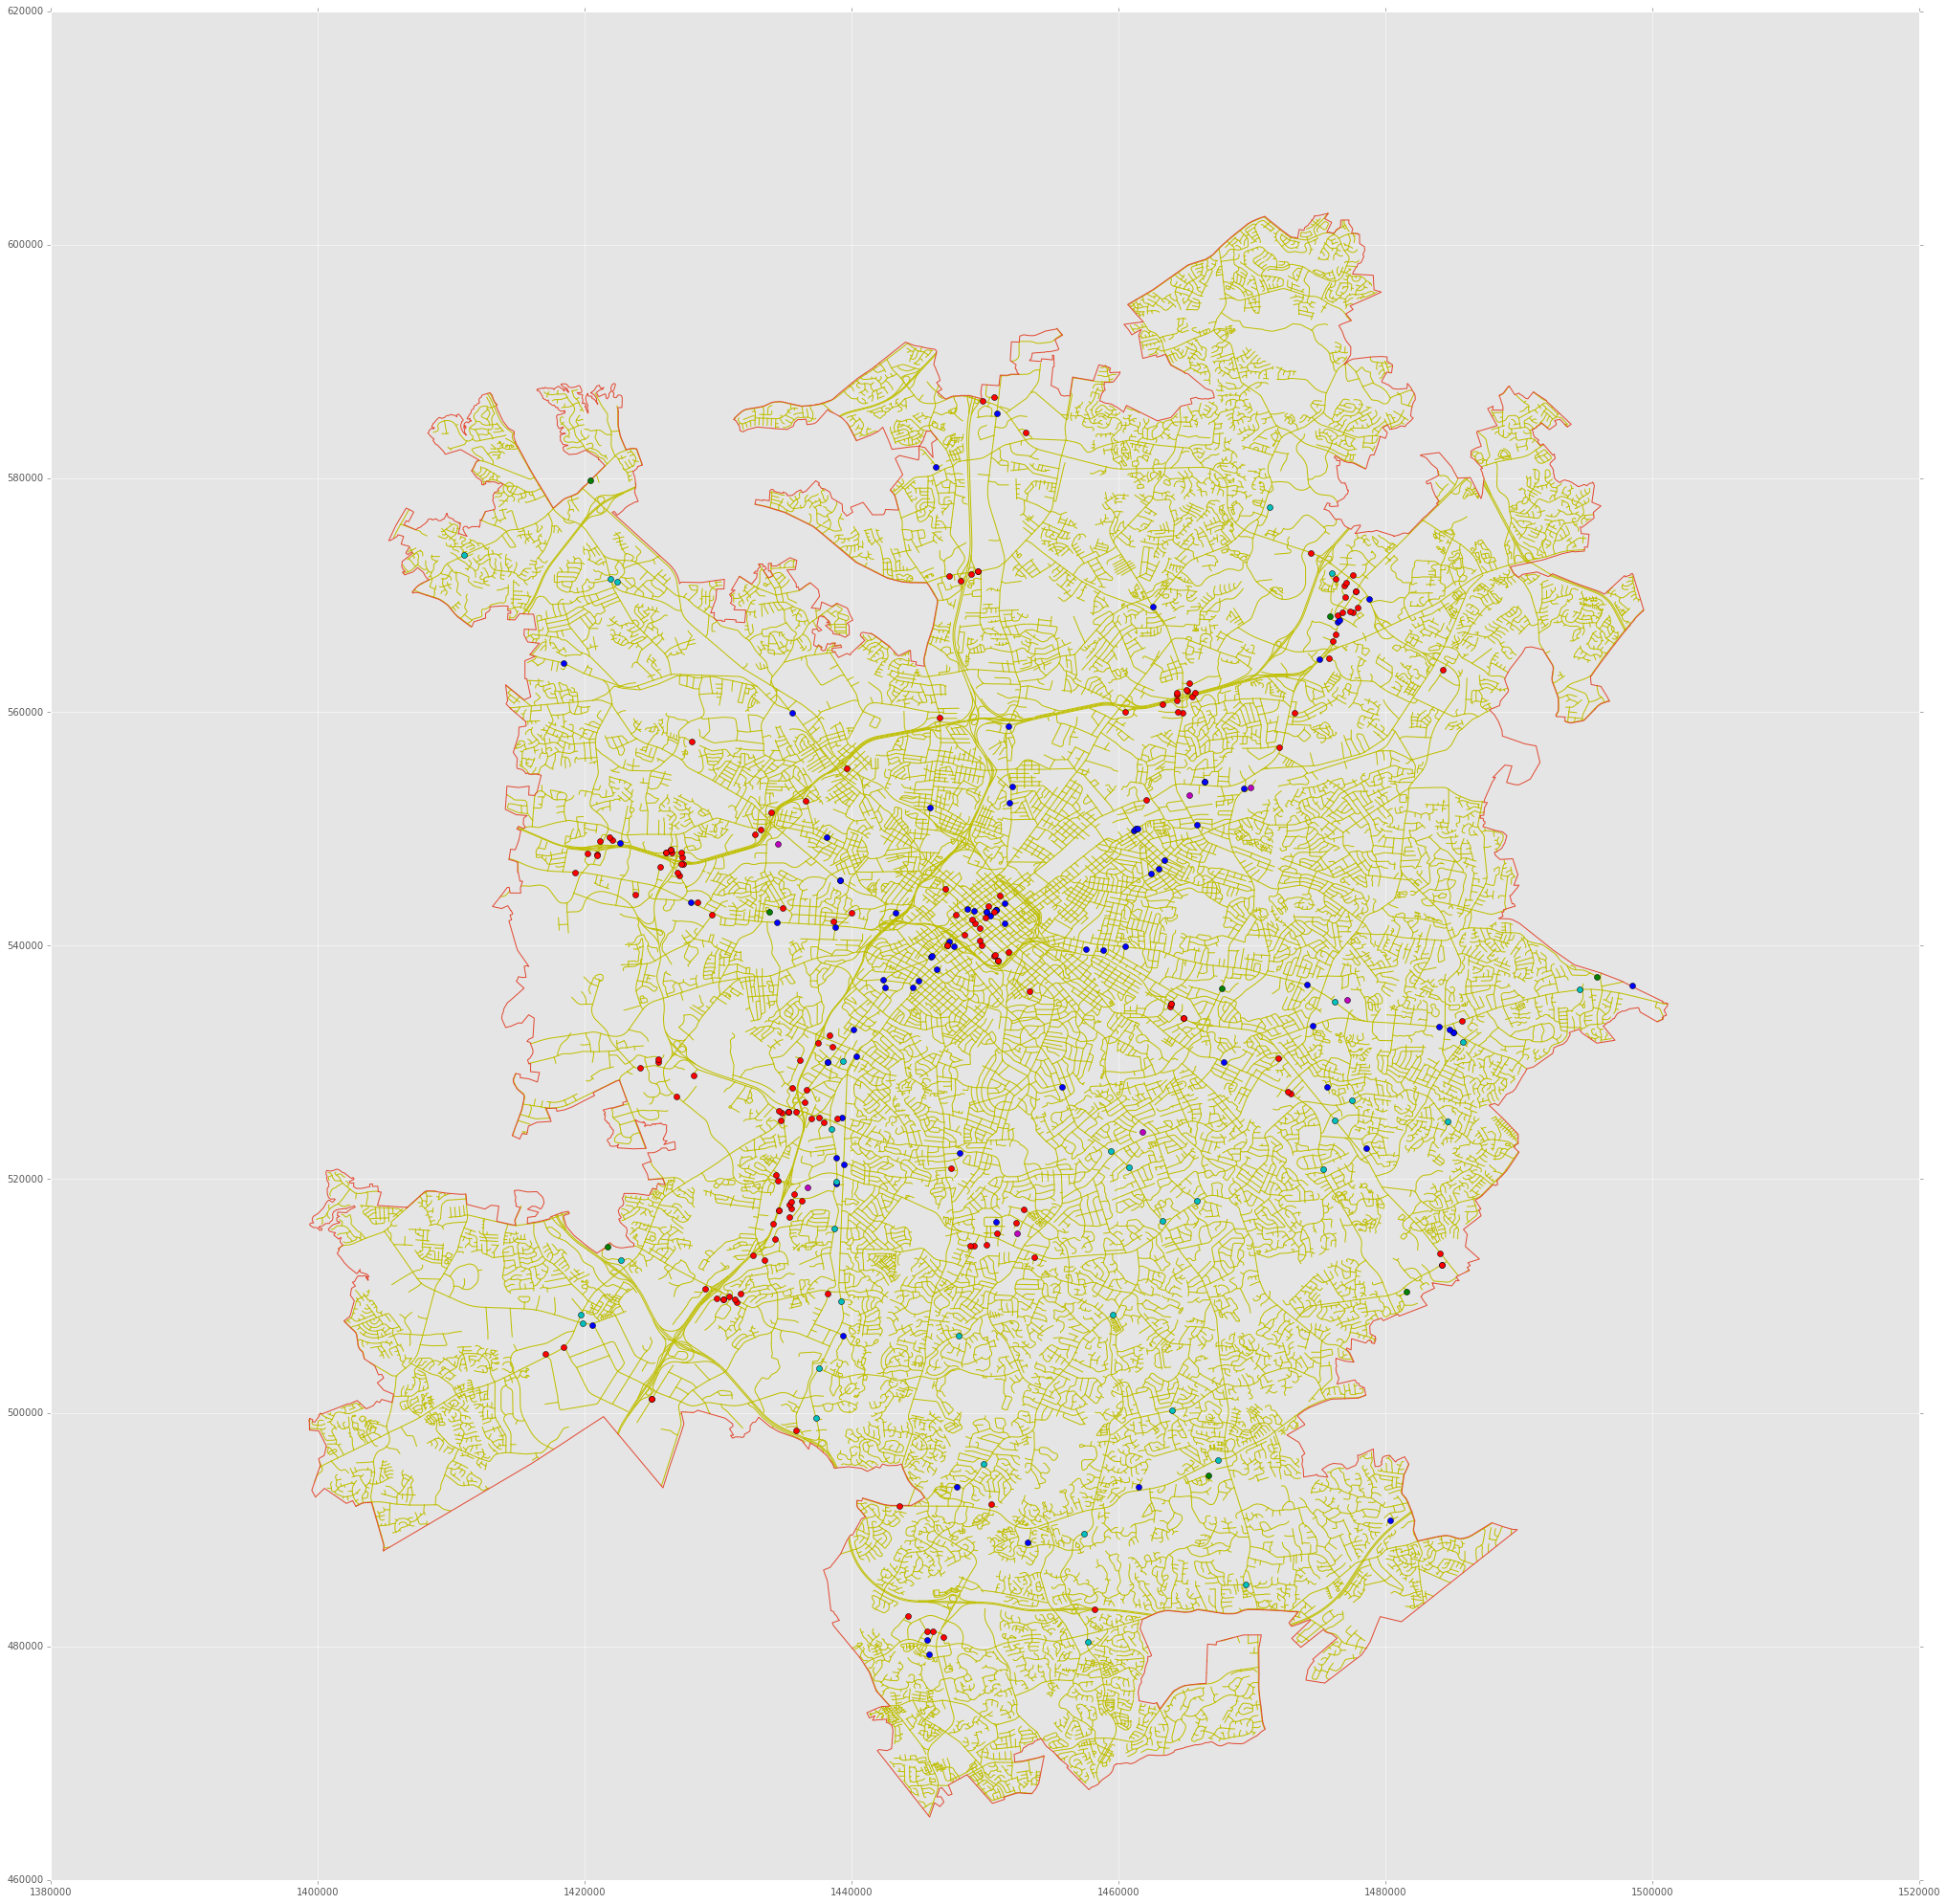

In [63]:
fig_size = [35, 35]
plt.rcParams["figure.figsize"] = fig_size
shape_layer("./dataset/Data/CLT_Streets.shp", style="y-")
shape_layer("./dataset/Data/CLT_Boundary.shp", style="-")

shape_layer("./dataset/Data/POI_WALMART.shp", style="go")
shape_layer("./dataset/Data/POI_AlcoholicDrinkingPlaces_CLIP.shp", style="bo")
shape_layer("./dataset/Data/POI_HotelsMotels.shp", style="ro")
shape_layer("./dataset/Data/POI_Malls.shp", style="mo")
shape_layer("./dataset/Data/POI_ParknRideFacilities.shp", style="co")

In [61]:
#              ist    attr
# walmart      7   ×  80
# alcoholic    84  ×  75
# hotelMotel   166 ×  74
#
# parkNride    33  ×  5     x,        y,       mode,    stopID,    desc
# malls        6   ×  5     objectID, address, bldg_sf, firm_name, name

db_mall = pysal.open('./dataset/Data/POI_Malls.dbf','r')
df_mall = pandas.DataFrame(db_mall[0:-1], columns=db_mall.header)
pandas.set_option('display.max_rows', 100)
print(len(df_mall))
df_mall

6


0                 1                         2  \
OBJECTID                       8                 3                         2   
ADDRESS       4400 FAIRVIEW ROAD  500  TYVOLA ROAD  160  S SHARON AMITY ROAD   
BLDG_SF                  1161538            298748                    273150   
FIRM_NAME  TRAMMELL CROW COMPANY               N/A             HILL PARTNERS   
NAME              SOUTHPARK MALL      TYVOLA PLACE             COTSWOLD MALL   

                              3                      4  \
OBJECTID                      7                      5   
ADDRESS    5651  CENTRAL AVENUE    3205  FREEDOM DRIVE   
BLDG_SF                 1220356                 374988   
FIRM_NAME   GLIMCHER PROPERTIES  FREEDOM MALL PARTNERS   
NAME              EASTLAND MALL           FREEDOM MALL   

                                  5  
OBJECTID                          4  
ADDRESS        4500  N TRYON STREET  
BLDG_SF                      310000  
FIRM_NAME  WALKER REAL ESTATE GROUP  
NAME                    TRYON PLACE